In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
churnData=pd.read_csv('Customer-Churn.csv')

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
churnData['TotalCharges']=pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [6]:
churnData['TotalCharges'].value_counts(dropna=False)

NaN        11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
6668.35     1
6096.90     1
140.70      1
797.10      1
5867.00     1
Name: TotalCharges, Length: 6531, dtype: int64

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


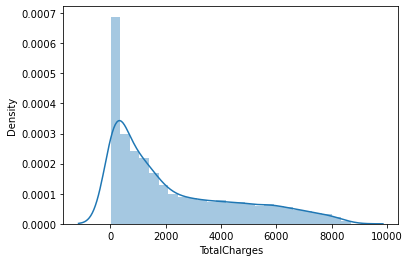

In [7]:
sns.distplot(churnData[churnData['TotalCharges'].isna()==False]['TotalCharges'])
plt.show()

In [8]:
churnData['TotalCharges']=churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [9]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
X= churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges' ,'TotalCharges']]

In [11]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X)
X_norm=transformer.transform(X)
X=pd.DataFrame(X_norm,columns=X.columns)

In [12]:
y= churnData['Churn']

In [13]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [16]:
predictions=classification.predict(X_test)
classification.score(X_test,y_test)

0.7842441447835344

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[936, 105],
       [199, 169]], dtype=int64)

In [18]:
from sklearn.utils import resample

data= pd.concat([X,y],axis=1)

category_0 = data[data['Churn'] == 'No']
category_1 = data[data['Churn'] == 'Yes']

In [19]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [20]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [21]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [22]:
X1= data_upsampled[['tenure', 'SeniorCitizen', 'MonthlyCharges' ,'TotalCharges']]
y1= data_upsampled['Churn']

In [23]:
transformer1=StandardScaler().fit(X1)
X_norm1=transformer1.transform(X1)
X1=pd.DataFrame(X_norm1,columns=X1.columns)

In [24]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [25]:
classification1=LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train1,y_train1)
predictions1=classification1.predict(X_test1)
classification1.score(X_test1,y_test1)

0.7241545893719806

In [26]:
confusion_matrix(y_test1,predictions1)

array([[739, 286],
       [285, 760]], dtype=int64)

In [27]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [28]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [29]:
X2= data_downsampled[['tenure', 'SeniorCitizen', 'MonthlyCharges' ,'TotalCharges']]
y2= data_downsampled['Churn']

In [30]:
transformer2=StandardScaler().fit(X2)
X_norm2=transformer2.transform(X2)
X2=pd.DataFrame(X_norm2,columns=X2.columns)

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [32]:
classification2=LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train2,y_train2)
predictions2=classification2.predict(X_test2)
classification2.score(X_test2,y_test2)

0.7179144385026738

In [33]:
confusion_matrix(y_test2,predictions2)

array([[262, 112],
       [ 99, 275]], dtype=int64)

In [34]:
#with up and down sampling the reslounts come up quite the same, improving in both cases the imbalance